# DeepLearning Reconnaissance d'images de Sport


In [33]:
!git clone https://github.com/MartinBoniol/DeepLearnig_Project
path = "./DeepLearnig_Project/Partition/"

fatal: destination path 'DeepLearnig_Project' already exists and is not an empty directory.


**Une fois les données téléchargées localement, on peut maintenant charger les images et les labels.**

In [34]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='Apprentissage', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

**Voici ensuite un exemple de chargement de nos données.**

In [35]:
labels = ['Rugby', 'Tennis', 'Foot', 'Hockey', 'Basket']

x_apprentissage, y_apprentissage = load_data(path, labels, dataset='Apprentissage', image_size=64)
print(x_apprentissage.shape, y_apprentissage.shape)

x_val, y_val = load_data(path, labels, dataset='Validation', image_size=64)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='Test', image_size=64)
print(x_test.shape, y_test.shape)

(700, 64, 64, 3) (700, 1)
(150, 64, 64, 3) (150, 1)
(150, 64, 64, 3) (150, 1)


**On affiche quelques-unes de nos images, et ainsi on vérifie que tout s'est bien passé.**





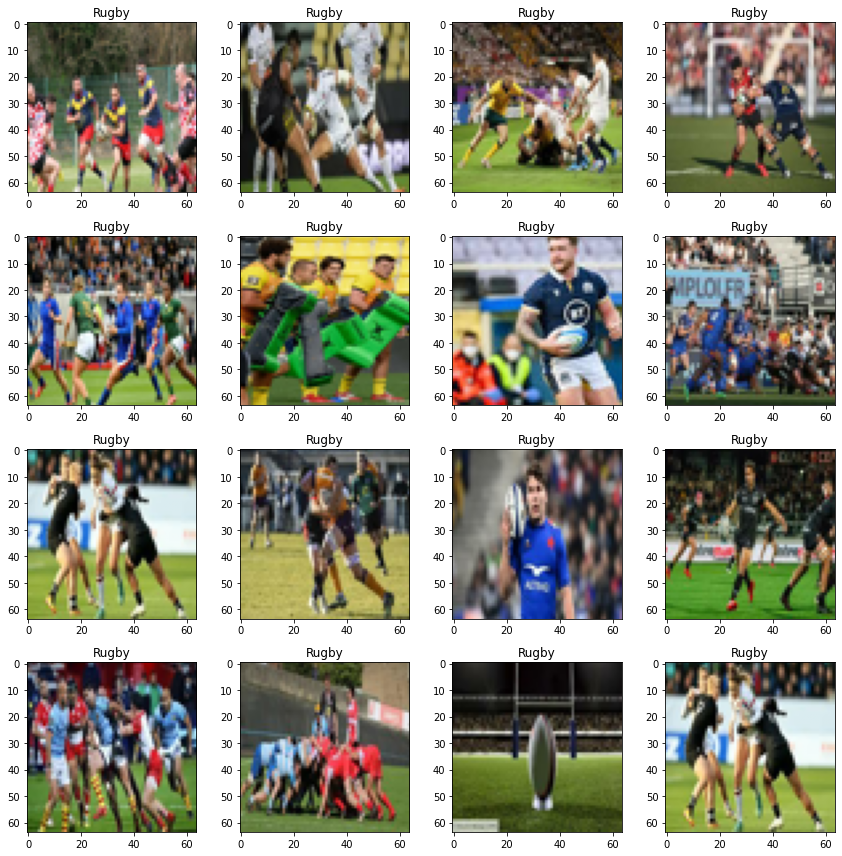

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(16)
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    image = x_val[shuffle_indices[i]]
    plt.title(labels[int(y_val[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

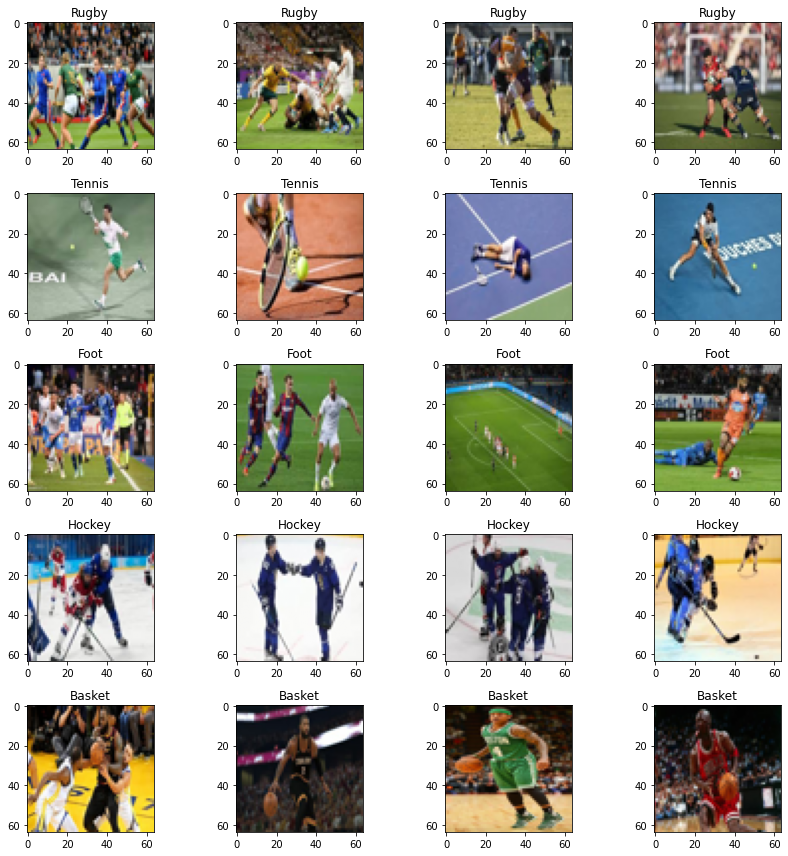

In [37]:
plt.figure(figsize=(12, 12))
shuffle_indices1 = np.random.permutation(30)
shuffle_indices2 = shuffle_indices1 + 30
shuffle_indices3 = shuffle_indices2 + 30
shuffle_indices4 = shuffle_indices3 + 30
shuffle_indices5 = shuffle_indices4 + 30
for i in range(0, 20):
  if i < 4:
    plt.subplot(5, 4, i+1)
    image = x_val[shuffle_indices1[i]]
    plt.title(labels[int(y_val[shuffle_indices1[i]])])
    plt.imshow(image/255)
  elif i<8:
    plt.subplot(5, 4, i+1)
    image = x_val[shuffle_indices2[i]]
    plt.title(labels[int(y_val[shuffle_indices2[i]])])
    plt.imshow(image/255)
  elif i<12:
    plt.subplot(5, 4, i+1)
    image = x_val[shuffle_indices3[i]]
    plt.title(labels[int(y_val[shuffle_indices3[i]])])
    plt.imshow(image/255)
  elif i<16:
    plt.subplot(5, 4, i+1)
    image = x_val[shuffle_indices4[i]]
    plt.title(labels[int(y_val[shuffle_indices4[i]])])
    plt.imshow(image/255)
  elif i<20:
    plt.subplot(5, 4, i+1)
    image = x_val[shuffle_indices5[i]]
    plt.title(labels[int(y_val[shuffle_indices5[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

#**Reseau convolutif de base**


In [38]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers

# Définition du modèle, auquel on va ensuite ajouter les différentes couches, dans l'ordre
model = Sequential()
#model.add(Dense(1, activation='sigmoid', input_dim=2)) # input_dim indique la dimension de la couche d'entrée, ici 2

#model.summary() # affiche un résumé du modèle


model.add(Conv2D(32,3,activation ="relu", input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="valid"))
model.add(Conv2D(64,(3,3),activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="valid"))
model.add(Conv2D(96,(3,3),activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="valid"))
model.add(Conv2D(128,(3,3),activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="valid"))

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
model.add(Dense(512, activation= "relu"))   # Couche dense, à 512 neurones
model.add(Dense(5, activation= "softmax"))   # Couche de sortie

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 96)        

#**Entrainement**

In [39]:
history = model.fit(x_apprentissage, y_apprentissage, validation_data=(x_val, y_val), epochs=10, batch_size=10)

Epoch 1/10
70/70 [==============================] - 1s 7ms/step - loss: 2.7932 - accuracy: 0.3814 - val_loss: 1.5468 - val_accuracy: 0.4133
Epoch 2/10
70/70 [==============================] - 0s 5ms/step - loss: 0.9071 - accuracy: 0.6629 - val_loss: 1.0192 - val_accuracy: 0.6533
Epoch 3/10
70/70 [==============================] - 0s 5ms/step - loss: 0.6086 - accuracy: 0.7771 - val_loss: 1.0375 - val_accuracy: 0.6267
Epoch 4/10
70/70 [==============================] - 0s 5ms/step - loss: 0.4917 - accuracy: 0.8243 - val_loss: 0.8413 - val_accuracy: 0.6867
Epoch 5/10
70/70 [==============================] - 0s 5ms/step - loss: 0.2760 - accuracy: 0.9129 - val_loss: 0.9061 - val_accuracy: 0.7267
Epoch 6/10
70/70 [==============================] - 0s 5ms/step - loss: 0.1703 - accuracy: 0.9471 - val_loss: 0.7986 - val_accuracy: 0.7267
Epoch 7/10
70/70 [==============================] - 0s 5ms/step - loss: 0.0647 - accuracy: 0.9871 - val_loss: 0.9041 - val_accuracy: 0.7133
Epoch 8/10
70/70 [==

#**Analyse des résultats du modèle**

In [40]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

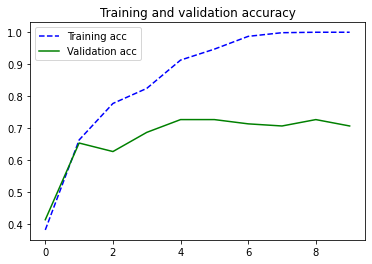

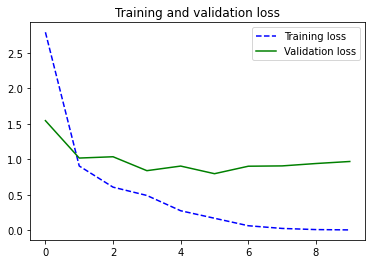

In [41]:
plot_training_analysis()

#**Correction du suraprentissage**

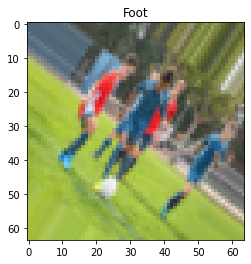

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1.0/255.0,
    horizontal_flip=True)

example_x, example_y = train_datagen.flow(x_apprentissage, y_apprentissage, batch_size=1).next()
for i in range(0,1):
    plt.imshow(example_x[i])
    plt.title(labels[int(example_y[i])])
    plt.show()

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()


model.add(Conv2D(32,(3,3),activation ="relu", input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="valid"))
model.add(Conv2D(64,(3,3),activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="valid"))
model.add(Conv2D(96,(3,3),activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="valid"))
model.add(Conv2D(128,(3,3),activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="valid"))

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
model.add(Dense(512, activation= "relu"))   # Couche dense, à 512 neurones
model.add(Dense(5, activation= "softmax"))   # Couche de sortie
model.summary()

model_saver = ModelCheckpoint('tmp/best_weights', monitor='val_sparse_categorical_accuracy', verbose=1, save_weights_only=True, save_best_only=True, mode='max')

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(train_datagen.flow(x_apprentissage, y_apprentissage, batch_size=10), 
                    validation_data=(x_val/255, y_val),
                    epochs=100,
                    callbacks=[model_saver])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 6, 6, 96)        

#**Analyse des résultats**

In [44]:
def plot_training_analysis2():
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

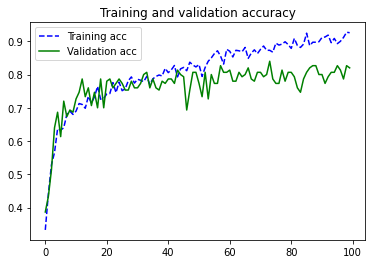

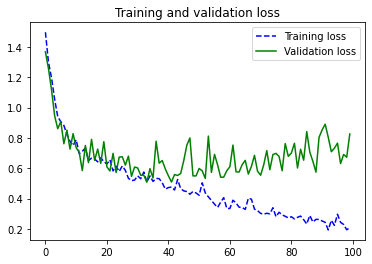

In [45]:
plot_training_analysis2()

In [46]:
model.load_weights('tmp/best_weights')

#**Matrice de confusion et précision par classe**



Calcul des différentes métriques : 

$$ P = \frac{TP}{TP + FP} $$

$$ R = \frac{TP}{TP + FN} $$

$$ F1 = \frac{2}{\frac{1}{P} + \frac{1}{R}} $$

où $TP$ désigne le nombre de vrais positifs, $FP$ le nombre de faux positifs, $FN$ le nombre de faux négatifs, $P$ la précision, $R$ le rappel et $F1$ le F1-score.

In [47]:
from sklearn.metrics import confusion_matrix

num_classes = 5

y_pred = model.predict(x_val/255)
y_max = np.argmax(y_pred, axis=1)

labels = ['Rugby', 'Tennis', 'Foot', 'Hockey', 'Basket']
cm = confusion_matrix(y_val, y_max)

print("Matrice de confusion : ")
print()
print(cm)


P = np.zeros(num_classes)
R = np.zeros(num_classes)
F_score = np.zeros(num_classes)

print()
print()
print()

total_correct_detections = 0
total_incorrect_detections = 0

class_res = []

for i in range(num_classes):

    TP = cm[i][i]
    FP = sum(cm[:][i]) - TP
    FN = np.sum(cm,axis=0)[i] - TP
    P[i] = TP/max(TP+FP,1)
    R[i] = TP/max(TP+FN,1)
    F_score[i] = 2*P[i]*R[i]/max(P[i]+R[i],1)
    total_correct_detections += TP
    total_incorrect_detections = total_incorrect_detections + FN + FP
    class_res.append({'Precision': P[i], 'Rappel': R[i], 'F-score': F_score[i]})


accuracy = (total_correct_detections/(total_correct_detections+total_incorrect_detections))*100

print(f"La précision globale est de {accuracy:.1f}%")

print()
print("--------------------------------------------")
print("|  Classe  | Précision | Rappel | F1-score |")
print("--------------------------------------------")
for i in range(num_classes):
  print(f"| {labels[i]:9s}|   {class_res[i]['Precision']:.2f}    |  {class_res[i]['Rappel']:.2f}  |   {class_res[i]['F-score']:.2f}   |")
  print("--------------------------------------------")


Matrice de confusion : 

[[26  0  2  0  2]
 [ 0 26  3  0  1]
 [10  1 18  0  1]
 [ 0  0  0 28  2]
 [ 1  0  1  0 28]]



La précision globale est de 72.4%

--------------------------------------------
|  Classe  | Précision | Rappel | F1-score |
--------------------------------------------
| Rugby    |   0.87    |  0.70  |   0.78   |
--------------------------------------------
| Tennis   |   0.87    |  0.96  |   0.91   |
--------------------------------------------
| Foot     |   0.60    |  0.75  |   0.67   |
--------------------------------------------
| Hockey   |   0.93    |  1.00  |   0.97   |
--------------------------------------------
| Basket   |   0.93    |  0.82  |   0.87   |
--------------------------------------------


#**Différents cas d'erreurs**

[14, 19, 20, 27]
[2, 4, 2, 4]


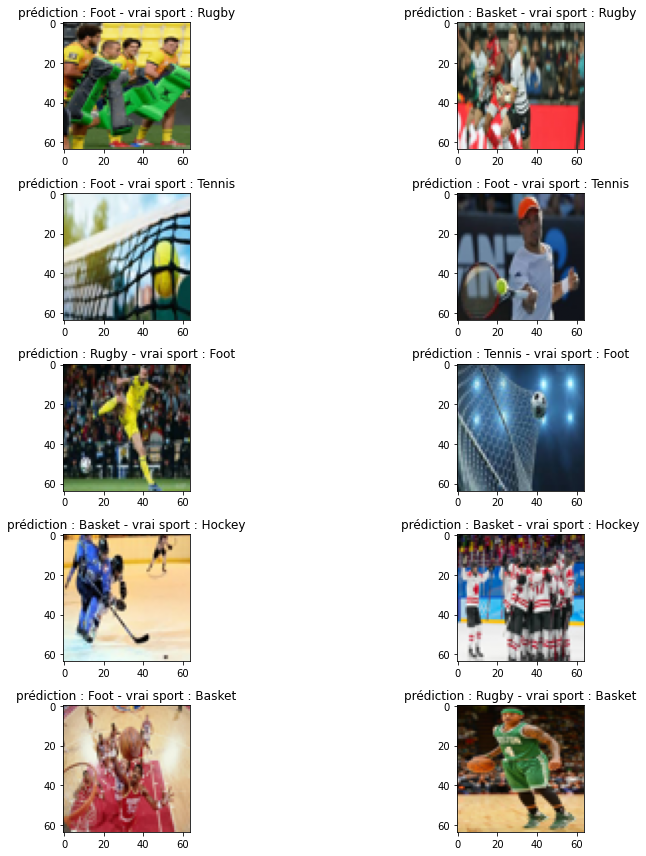

In [48]:
class_metrics = []
for i in range(num_classes):
    class_metrics.append({'FN': [], 'Sport_Confondu': []})


for i in range(num_classes):
  for j in range(30*(i+1)):
    if y_val[j] == i and y_max[j] != i:
      class_metrics[i]['FN'].append(j)
      class_metrics[i]['Sport_Confondu'].append(y_max[j])

print(class_metrics[0]['FN'])
print(class_metrics[0]['Sport_Confondu'])

plt.figure(figsize=(12, 12))
for i in range(num_classes):
    plt.subplot(5, 2, i*2+1)
    image = x_val[class_metrics[i]['FN'][0]]
    plt.title("prédiction : " + labels[class_metrics[i]['Sport_Confondu'][0]] + " - vrai sport : " +  labels[i])
    plt.imshow(image/255)

    plt.subplot(5, 2, i*2+2)
    image = x_val[class_metrics[i]['FN'][1]]
    plt.title("prédiction : " + labels[class_metrics[i]['Sport_Confondu'][1]] + " - vrai sport : " +  labels[i])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

In [ ]:
np.trace(cm)/np.sum(cm)

0.86

In [ ]:
model.evaluate(x_val/255, y_val)

5/5 [==============================] - 0s 7ms/step - loss: 0.5980 - sparse_categorical_accuracy: 0.8600


[0.5979533791542053, 0.8600000143051147]

#**Nouvelle approche**

 **On a ensuite voulu tester un autre réseau le réseau VGG-16 avec la technique du transfert learning mais sans succès** 

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(64, 64, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
train_features = conv_base.predict(x_apprentissage)
train_features = np.reshape(train_features,(train_features.shape[0],2*2*512))

val_features = conv_base.predict(x_val)
val_features = np.reshape(val_features,(val_features.shape[0],2*2*512))

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

model = Sequential()

model.add(Dense(512, activation='sigmoid', input_dim=2048))
model.add(Dense(5, activation='sigmoid'))

model.summary()

model.compile(optimizer=optimizers.Adam(lr=3e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

history = model.fit(train_features, y_apprentissage,
                    epochs=50,
                    batch_size=10,
                    validation_data=(val_features, y_val))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               1049088   
                                                                 
 dense_25 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 1,051,653
Trainable params: 1,051,653
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


70/70 [==============================] - 1s 8ms/step - loss: 0.9895 - sparse_categorical_accuracy: 0.6157 - val_loss: 0.6882 - val_sparse_categorical_accuracy: 0.7400
Epoch 2/50
70/70 [==============================] - 0s 3ms/step - loss: 0.2465 - sparse_categorical_accuracy: 0.9557 - val_loss: 0.5948 - val_sparse_categorical_accuracy: 0.7467
Epoch 3/50
70/70 [==============================] - 0s 3ms/step - loss: 0.1084 - sparse_categorical_accuracy: 0.9943 - val_loss: 0.5610 - val_sparse_categorical_accuracy: 0.7800
Epoch 4/50
70/70 [==============================] - 0s 3ms/step - loss: 0.0630 - sparse_categorical_accuracy: 0.9971 - val_loss: 0.5576 - val_sparse_categorical_accuracy: 0.7933
Epoch 5/50
70/70 [==============================] - 0s 3ms/step - loss: 0.0444 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5537 - val_sparse_categorical_accuracy: 0.8000
Epoch 6/50
70/70 [==============================] - 0s 3ms/step - loss: 0.0342 - sparse_categorical_accuracy: 1.0000 - va

Augmentation de données

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               1049088   
                                                                 
 dense_27 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 15,766,341
Trainable params: 15,766,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(train_datagen.flow(x_apprentissage, y_apprentissage, batch_size=10), 
                    validation_data=(x_val/255, y_val),
                    epochs=100,
                    )

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               1049088   
                                                                 
 dense_27 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 15,766,341
Trainable params: 1,051,653
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/100
70/70 [==============================] - 2s 28ms/step - loss: 0.4414 - sparse_categorical_accuracy: 0.8286 - val_loss: 0.6431 - val_sparse_categorical_ac

In [ ]:
np.sum(np.where(y_apprentissage==4,1,0))

140